<a href="https://colab.research.google.com/github/rahiakela/deep_learning_for_vision_systems/blob/3-convolutional-neural-networks/1_image_classification_using_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using MLP

Neurons are stacked in layers on top of each
other with weights connections. The MLP architecture consists of 

* 1) input layer, 
* 2) one or more hidden layers, and 
* 3) output layer.

<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/mlp-architecture.png?raw=1' width='800'/>

Let’s look at the three main components of our MLP architecture (input layer, hidden layers, and output layer).

## Setup

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'The MNIST database has a training set of {str(len(X_train))} examples.')
print(f'The MNIST database has a test  set of {str(len(X_test))} examples.')

11493376/11490434 [==============================] - 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test  set of 10000 examples.


## Input layer

First, let’s see how computers see images: In the figure below, we have an image of 28 pixels wide x 28 pixels height. This image is seen by the computer as a 28x28 matrix with pixel values range from 0 to 255 (0 for black and 255 for white and the range in between for gray scale).

<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/image-sample.png?raw=1' width='800'/>

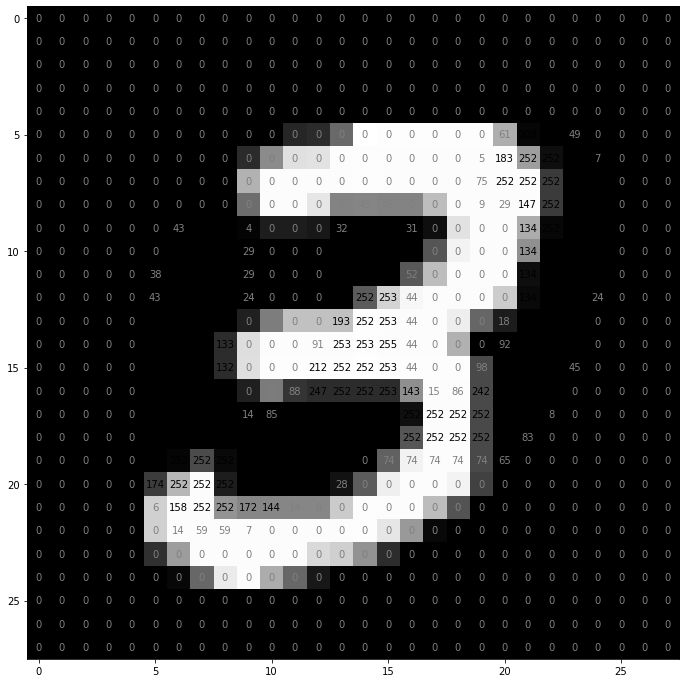

In [6]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(x, y), horizontalalignment='center', verticalalignment='center', 
                  color='gray' if img[x][y] < thresh else 'black')
      
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[7], ax)

In [9]:
X_train[7].reshape(1, 784)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
        253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  43

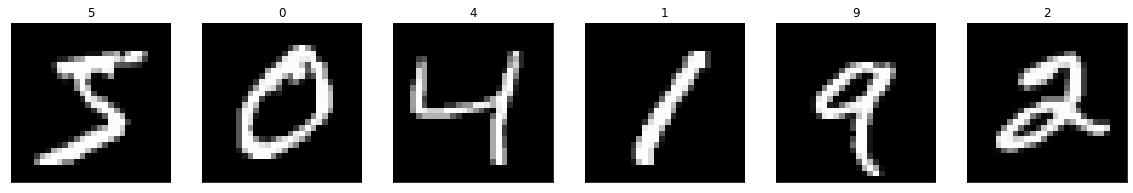

In [10]:
# plot first six training images
fig = plt.figure(figsize=(20, 20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

Since MLPs only take the input as a 1D vector with dimensions (1, n), they cannot take the raw 2D image matrix with dimensions (x, y). To fit the image in the input layer, we first need to transform our image into one large vector with the dimensions (1, n) that contains all the pixels’ values of the image. This process is called image flattening. 

In this example, the total number (n) of pixels in this image is 28 x 28 = 784. Then, in order to feed this image to our network, we need to flatten the (28x28) matrix to one long vector with dimensions (1, 784). The input vector will look like this:

x = [row1, row2, row 3, ……., row 28]

That said, the input layer in this example will have a total of 784 nodes. x1, x2, x3....... x784.

Here is how we flatten the input image in Keras:
```python
# define the model
model = Sequential()
# add the flatten layer - also known as the input layer
model.add( Flatten(input_shape = (28,28) )
```

Alright, the Flatten layer in Keras takes care of this process for us. It takes the 2D image
matrix input and converts it to a 1D vector. Note that the Flatten layer must be supplied a
parameter value of the shape of the input image. Now the image is ready to be fed to the
neural network.

So to allow the network to understand 2D images, we need to preprocess the images first before feeding them to the network.

## Hidden Layers

The neural network can have one or more hidden layers
(technically, as many as you want). Each layer has one or more neurons (also technically as many as you want). Your main job, as a neural network engineer, is to design these layers.

let’s say we decided to arbitrarily design the network to have 2 hidden layers, each have 512 nodes. And don’t forget to add the ReLU activation function for
each hidden layer.

let’s add two Dense layers using Keras. Dense layer is another
name for Fully Connected layer (FC).

```python
# add two Dense layers with 512 nodes each
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
```

## Output Layer

The output layer is pretty straight forward. In classification problems, the number of nodes in the output layer should be equal to the number of classes that you are trying to classify. 

In this problem, we are classifying 10 digits (0, 1, 2, 3, 4, 5, 6, 7 ,8 , 9). Then we will need to add one last Dense layer that contains 10 nodes.

```python
# add one output Dense layer with 10 nodes
model.add(Dense(10, activation = 'softmax'))
```

## Putting it all together

When we put all these layers together we get the following neural network:

<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/neural-network-architecture.png?raw=1' width='800'/>

In [14]:
# define the neural network architecture
model = Sequential()

# add the flatten layer
model.add(Flatten(input_shape=(28, 28)))

# add two hidden layers with 512 nodes each
model.add(Dense(512, activation='relu'))        # it is recommended to use relu activation func in the hidden layers
model.add(Dense(512, activation='relu'))

# add one output Dense layer with 10 nodes
model.add(Dense(10, activation='softmax'))      # it is recommended to use softmax act func in the output layer for multiclass classification problems

# print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The **Param #** field represents the number of parameters (weights) that are produced at each layer. These are the weights that will be adjusted and learned during the training process.
They are calculated as follows:
* Params after the flatten layer is 0 because this layer only flattens the image to a vector to be fed to the input layer. The weights haven’t been added yet.
* params after layer1 = 784 nodes in input layer X 512 in hidden layer 1 +512 connections to biases = 401,920
* params after layer2 = 512 nodes in hidden layer 1 X 512 in hidden layer 2 +512 connections to biases =262,656
* params after layer3= 512 nodes in hidden layer 2 X 10 in output layer +10 connections to biases =5,130
* total params in the network = 401,920 + 262,656 + 5130 =669,706

That said, this means that in this tiny network, we have a total of 669,706 parameters (weights and biases) that the network needs to learn and tune their values to optimize the error function. This is a **huge number for such a small network**. You can see how this number will grow out of control when we add more nodes and layers or when we use bigger images.This is a major drawback of **MLPs**.

## Drawbacks of MLPs in processing images

Let’s discuss the two major problems in MLPs that the Convolutional Networks are designed to fix:

**1) Flattening the image to a 1D vector input leads to losing the spatial features of 2D images**

Before feeding the image to the hidden layers, we must flatten the image matrix to a 1D vector because MLPs take a flatten vector as an input. Which means throwing away all the 2D information contained in an image. Treating an input as a simple vector of number with no special structure might work well for 1D signals, like the housing price (structured data).

But in 2D images, it will lead to information loss because the network doesn’t relate the pixel values to each other when trying to find patterns.

**MLPs** have no knowledge of the fact that these pixel numbers were originally spatially arranged in a grid and that they are connected to each other.

**CNNs** on the other hand, do not require flattening the image. We can feed
the raw image matrix of pixels to our network. This will allow the CNN to understand that pixels that are close to each other are heavily related than the pixels that are far apart.

Let’s oversimplify things to learn more about the importance of spatial features in an image. Suppose we are trying to teach our neural network to identify the shape of a square. In the image below, consider the pixel values 1 is white and 0 is black. Then when we draw a white square on a black background, the matrix will look like this:

<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/drawbacks-of-MLP-1.png?raw=1' width='800'/>

Since MLPs take 1D vector as an input, then in order to feed the image to the MLP we have to flatten the 2D image to a 1D vector. The input vector of the above image will look like this:

Input vector = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

When the training is complete, the network will learn to identify a square only when the input nodes x1, x2, x5, and x6 are fired. But what happens when we have new images with square shapes but located in different areas in the image?
<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/drawbacks-of-MLP-2.png?raw=1' width='800'/>

The MLP will have no idea that these are the shapes of squares because the network didn’t learn the square shape as a feature. Instead, it learned the input nodes that when fired might lead to a square picture. With that said, in order to teach squares to our network we need a lot of square images located everywhere in the image. You can see how this solution won’t scale for complex problems because in order to teach squares to our network we need to feed it images of squares located everywhere in the picture.

Another example of feature learning: if we want to teach the network to recognize cats, ideally we want the neural network to learn the full shape of the cat features regardless to where they appear on the image (ears, nose, eyes, etc.). This only happens when the network looks at the image as a set of pixels that when close to each other they are heavily related.
<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/drawbacks-of-MLP-3.png?raw=1' width='800'/>

**2) Fully connected (dense) layers**

MLPs are composed of Dense layers that are fully connected to each other. Fully
connected means that every node in one layer is connected to ALL nodes from the
previous layer and all nodes in the next layer. 

In this scenario, each neuron will have parameters (weights) to train per each neuron from the previous layer. While this was not a big problem for the MNIST dataset because the images are really small in size (28x28), but what happens when we are trying to process bigger images? 

For example, if we have an image with dimensions = (1,000 x 1,000), it will yield a million parameters for each single node in the first hidden layer. So if the first hidden layer has 1,000 neurons, this will yield a 1 billion parameters in such a small network. 

You can imagine the computational complexity to optimize 1 billion parameters after only the first layer. This number will drastically increase when we have tens or hundreds of layers. This could get out of control pretty fast and will not scale.

**CNNs** on the other hand are locally connected layers. Where there nodes are connected to only a small subset of the previous layers’ nodes. Locally connected layers use far fewer parameters than a densely connected layer as we will see when we discuss CNNs.

<img src='https://github.com/rahiakela/img-repo/blob/master/deep_learning_for_vision_systems/drawbacks-of-MLP-4.png?raw=1' width='800'/>


## Conclusion

The loss of information caused by flattening the 2D image matrix to a 1D vector and the computational complexity of fully connected layers with larger images suggest that we need an entirely new way of processing the image input where the 2D information is not entirely lost. This is where Convolutional Networks come in. CNNs accept the full image matrix as an input which helps the network significantly understand the pattern contained in the pixel values.